![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [71]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis

In [72]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [73]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


## Data Preprocessing

In [74]:
# Categorical encoding

penguins_enc = pd.get_dummies(penguins_df, drop_first=True)
penguins_enc.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [75]:
# Feature Scaling

std = StandardScaler()
penguins_scaled = pd.DataFrame(std.fit_transform(penguins_enc), columns=penguins_enc.columns)
penguins_scaled.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,9.939939e-01


## Choosing number of clusters for KMeans

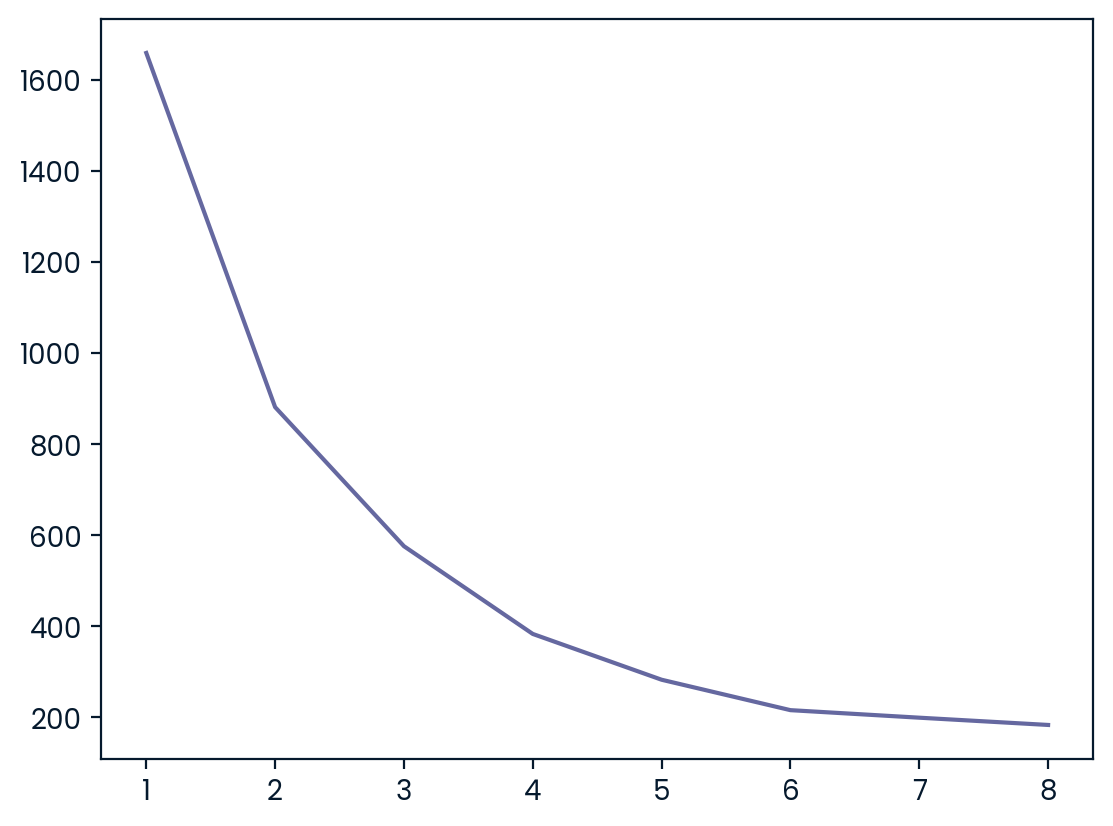

In [76]:
# Elbow analysis
inertia=[]
n_clusters = range(1, 9)

for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(penguins_scaled)
    inertia.append(model.inertia_)

plt.plot(n_clusters,inertia)
plt.show()

## Performing Clustering with 3 clusters

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_scaled)
labels = kmeans.predict(penguins_scaled)
print(labels)

[0 2 2 2 0 2 0 2 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2
 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 0 0
 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0
 0 2 0 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


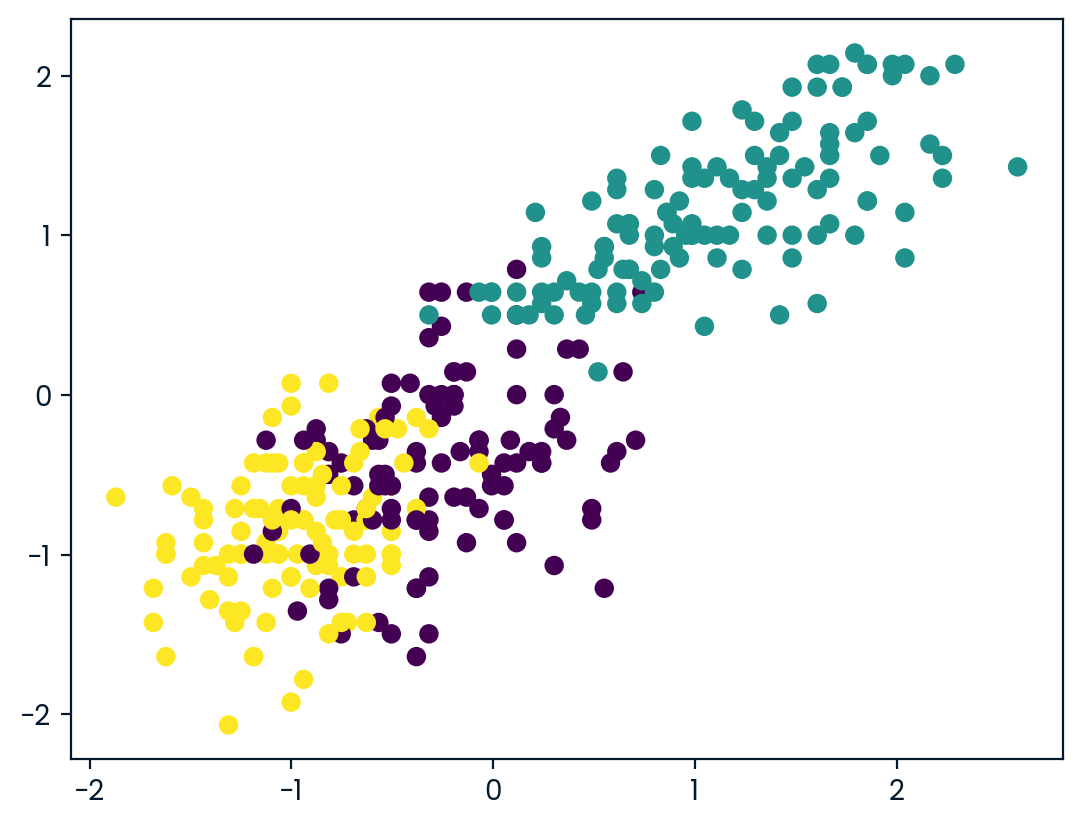

In [78]:
# Visualizing clusters
plt.scatter(penguins_scaled[["body_mass_g"]], penguins_scaled[["flipper_length_mm"]], c=labels)
plt.show()

In [79]:
# Attaching labels to dataset
penguins_clustered = penguins_df
penguins_clustered["cluster"] = labels
penguins_clustered.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,0


In [80]:
# Collecting average values for the clusters
stat_penguins = penguins_clustered.groupby("cluster").mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879
